# **DATA PREPARATION**


**Import necessary python libraries/packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator

%matplotlib inline

**Create datasets directory and download necessary dataset (Optional, only needed if run on Google Colab)** 

In [2]:
if not os.path.isdir('./datasets'):
  os.mkdir(os.path.join(os.getcwd(),'datasets'))
  !wget --no-check-certificate 'https://drive.google.com/uc?id=1RC_lT8pjL-9VcsAWWUtgozawXnWJrHm8&export=download' -O ./datasets/state-areas.csv
  !wget --no-check-certificate 'https://drive.google.com/uc?id=14CBMK_x1F9ItBZBdVO9NJZyBqsRiPLnu&export=download' -O ./datasets/us_population.csv
  !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ISR82P-IHv78tFWjXFmsyFNq5aQEO1Rj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ISR82P-IHv78tFWjXFmsyFNq5aQEO1Rj" -O ./datasets/dot_traffic_2015.txt.gz && rm -rf /tmp/cookies.txt
  !wget --no-check-certificate 'https://drive.google.com/uc?id=1d6q_cQ98Mz8oHEQ3RFvfm33HhfT2fhrq&export=download' -O ./datasets/dot_traffic_stations_2015.txt.gz

**Import 2015 US Traffic datasets**

In [3]:
# Files path
path = './datasets/dot_traffic_2015.txt.gz'
path_stations = './datasets/dot_traffic_stations_2015.txt.gz' 
path_pkl = './datasets/dot_traffic_2015.pkl'
path_stations_pkl = './datasets/dot_traffic_stations_2015.pkl'

# Read the files using pandas library
if os.path.exists(path_pkl) and os.path.exists(path_stations_pkl):
    df = pd.read_pickle(path_pkl)
    df_ts = pd.read_pickle(path_stations_pkl)
else:
    df = pd.read_csv(path,delimiter=',',compression='gzip',quotechar='"',header=0,engine='c')
    df_ts = pd.read_csv(path_stations,delimiter=',',compression='gzip',quotechar='"',header=0,engine='c')

    # Save as pickle files for next faster read time
    pd.to_pickle(df,path_pkl)
    pd.to_pickle(df_ts,path_stations_pkl)

# Set the dataframe column option to max so that the hidden columns will be shown as well
pd.set_option('display.max_columns',None)

**US 2015 Traffic Raw Data:**
- daily observation of traffic volume, divided into 24 hourly bins
- station_id, location information (geographical place), traffic flow direction, and type of road

In [4]:
df.head()

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15


**US 2015 Traffic Station Raw Data:** 
- deeper location and historical data on individual observation stations, cross-referenced by station_id


In [5]:
df_ts.head()

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,3,Permanent vehicle classification device,Y,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),4,Portable weigh-in-motion system,3,Permanent vehicle classification device,Y,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,0,NaN,3,Permanent vehicle classification device,Y,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used f

**US States Area Raw Data:**
- areas ($miles^2$) of each state in US

Reference link: [states-areas](https://github.com/jakevdp/data-USstates/blob/master/state-abbrevs.csv)

Note: States area is one of the important matrix to help us visualize the traffic density in each state

In [6]:
# Read csv file
df_areas = pd.read_csv('./datasets/state-areas.csv')
# Transform area from miles^2 to km^2 (more mathematical intuitive for people living in Asian region)
df_areas['area(sq.km)'] = df_areas['area (sq. mi)']*2.58999

# Visualize first 5 rows of the dataframe
df_areas.head()

,state,area (sq. mi),area(sq.km)
0,Alabama,52423,1.357750e+05
1,Alaska,656425,1.700134e+06
2,Arizona,114006,2.952744e+05
3,Arkansas,53182,1.377408e+05
4,California,163707,4.239995e+05


**US Population Across Each State Raw Data:**
- Population from 2010 to 2019 (We only care about the population on 2015 since we only have 2015 US Traffic Data)


Reference link: [US_Population](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html)

Note: Population is another important matrix to help us determine whether the amount of people living in each state affects the traffic volume 

In [7]:
# Read csv_file
df_population = pd.read_csv('./datasets/us_population.csv',skiprows=3,delimiter=',',thousands=',',quotechar='"')

# Rename for unnamed column and drop some non-important rows 
df_population.rename(columns={'Unnamed: 0':'State'},inplace=True)
df_population.drop([0,1,2,3,4,56,58,59,60,61,62],inplace=True)
df_population.reset_index(drop=True,inplace=True)

# Visualize first 5 rows of the data frame 
df_population.head()

,State,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
1,Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
2,Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
3,Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
4,California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


**Check basic info on the US 2015 Traffic dataframe**

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

**Check basic info on the US 2015 Traffic Station dataframe**

In [9]:
df_ts.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

**Convert the fips state code to postal code and state name**

Reference link: [State FIPS Codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696)


In [10]:
# Dictionary (also known as hash map) to convert fips state code into postal code
fips_to_postal = {1:'AL',2:'AK',4:'AZ',5:'AR',6:'CA',8:'CO',9:'CT',10:'DE',11:'DC',12:'FL',13:'GA',15:'HI',16:'ID',
                17:'IL',18:'IN',19:'IA',20:'KS',21:'KY',22:'LA',23:'ME',24:'MD',25:'MA',26:'MI',27:'MN',
                28:'MS',29:'MO',30:'MT',31:'NE',32:'NV',33:'NH',34:'NJ',35:'NM',36:'NY',37:'NC',38:'ND',
                39:'OH',40:'OK',41:'OR',42:'PA',44:'RI',45:'SC',46:'SD',47:'TN',48:'TX',49:'UT',50:'VT',
                51:'VA',53:'WA',54:'WV',55:'WI',56:'WY',60:'AS',66:'GU',69:'MP',72:'PR',78:'VI'}


In [11]:
# Dictionary (also known as hash map) to convert fips state code into state name
fips_to_state = {1:'Alabama',2:'Alaska',4:'Arizona',5:'Arkansas',6:'California',8:'Colorado',9:'Connecticut',10:'Delaware',
                11:'District of Columbia',12:'Florida',13:'Georgia',15:'Hawaii',16:'Idaho',17:'Illinois',18:'Indiana',19:'Iowa',
                20:'Kansas',21:'Kentucky',22:'Louisiana',23:'Maine',24:'Maryland',25:'Massachusetts',26:'Michigan',27:'Minnesota',
                28:'Mississippi',29:'Missouri',30:'Montana',31:'Nebraska',32:'Nevada',33:'New Hampshire',34:'New Jersey',
                35:'New Mexico',36:'New York',37:'North Carolina',38:'North Dakota',39:'Ohio',40:'Oklahoma',41:'Oregon',
                42:'Pennsylvania',44:'Rhode Island',45:'South Carolina',46:'South Dakota',47:'Tennessee',48:'Texas',49:'Utah',
                50:'Vermont',51:'Virginia',53:'Washington',54:'West Virginia',55:'Wisconsin',56:'Wyoming',60:'American Samoa',
                66:'Guam',69:'Northern Mariana Islands',72:'Puerto Rico',78:'Virgin Islands'}

# **FEATURE ENGINEERING for Raw Traffic Dataset**


**Sum the traffic volume from 12am-11:59pm for each row**

In [12]:
# Total traffic volume for each row on traffic dataset
df['total_traffic_volume'] = df.iloc[:,13:37].sum(axis=1)

**Turn raw traffic data into meaningful features and create a new dataframe which the traffic volume is being grouped according to each fips state code**

In [13]:
# Sum the total traffic volume with respect to each fips state code (the total traffic volume is being sorted from low to high)
total_traffic_volume = df.groupby(by=['fips_state_code'])['total_traffic_volume'].sum().sort_values()

# New DataFrame: Total Traffic volume wrt each fips code
df_tv_postal=pd.DataFrame(np.array([total_traffic_volume.index,total_traffic_volume.values]).T, columns=['fips_state_code','total_traffic_volume'])

**Create an explicit function to add new features to the new dataframe (df_tv_postal) created above**

In [14]:
# Function to add features
def important_features_addition(df_func):
    #############################################################################################################
    ## Postal code and state name for each fips state code ##
    postal = []
    state = []
    for x in df_func['fips_state_code']:
        postal.append(fips_to_postal[x])
        state.append(fips_to_state[x])

    # Add new features columns (postal_code, state)
    df_func['postal_code'] = postal
    df_func['state'] = state

    #############################################################################################################
    ## Total traffic stations wrt every fips state code ##
    total_stations = []
    for x in df_func['fips_state_code']:
        total_station = df[df['fips_state_code']==x]['station_id'].value_counts().shape[0]
        total_stations.append(total_station)

    # Add new features column (total_stations)
    df_func['total_stations'] = total_stations

    ############################################################################################################
    ## Total data wrt every fips state code ##
    total_data = []
    for x in df_func['fips_state_code']:
        data_temp = df[df['fips_state_code']==x].shape[0]
        total_data.append(data_temp)

    # Add new features column (total_data)
    df_func['total_data'] = total_data

    #############################################################################################################
    ## Monthly and quaterly traffic volume wrt every fips state code ##
    months_tv = []
    for x in df_func['fips_state_code']:
        temp = df[df['fips_state_code']==x]
        for i in range(1,13):
            month_tv = temp[temp['month_of_data']==i].iloc[:,13:37].sum(axis=1).sum(axis=0)
            months_tv.append(month_tv)

    # Add new features columns (traffic_volume_month_x, traffic_volume_quarter_y) --> x = [1 to 12] , y = [1 to 4]
    months_tv = np.array(months_tv)
    months_tv = months_tv.reshape(-1,12)
    for i in range(1,13):
        df_func['traffic_volume_month_{}'.format(i)] = months_tv[:,i-1]
    for i in range(4):
        df_func['traffic_volume_quarter_{}'.format(i+1)]=df_func.iloc[:,6+i*3:6+(i+1)*3].sum(axis=1)

    #############################################################################################################
    ## Quaterly traffic volume of a day wrt every fips state code --> 1st Quarter: 12am-6am ,2nd Quarter: 6am-12pm,
    ## 3rd Quarter: 12pm-6pm, 4th Quarter: 6pm-12am ##
    daily_quarter_data = []
    for x in df_func['fips_state_code']:
        for i in range(4):
            quarter_data = df[df['fips_state_code']==x].iloc[:,13+i*6:13+(i+1)*6].sum(axis=1).sum(axis=0)
            daily_quarter_data.append(quarter_data)

    # Add new features column (traffic_volume_daily_quarter_z) --> z = [1 to 4]
    daily_quarter_data = np.array(daily_quarter_data)
    daily_quarter_data = daily_quarter_data.reshape(-1,4)
    for i in range(4):
        df_func['traffic_volume_daily_quarter_{}'.format(i+1)] = daily_quarter_data[:,i]

    #############################################################################################################
    ## State area and state population ##
    area = []
    population = []
    for x in df_func['state']:
        area.append(df_areas[df_areas['state'] == x]['area(sq.km)'].values[0])
        population.append(df_population[df_population['State'] == x]['2015'].values[0])

    # Add new features columns  (area(sq.km), population)
    area = np.array(area)
    population = np.array(population)    
    df_func['area(sq.km)'] = area
    df_func['population'] = population


    #############################################################################################################
    ## Traffic volume per squared kilometer and traffic volume over population wrt each state ##
    #Add new features columns  (traffic_volume_per_sq.km, traffic_volume_over_population)
    df_func['traffic_volume_per_sq.km'] = df_func['total_traffic_volume']/df_func['area(sq.km)']
    df_func['traffic_volume_over_population'] = df_func['total_traffic_volume']/df_func['population']

    

**Applies new features on df_tv_postal dataframe**

In [15]:
# df_tv_postal is being passed by reference, all new features being added when calling "important_features_addition" function
important_features_addition(df_tv_postal)

**See the added features for the first 5 rows of df_tv_postal**


In [16]:
df_tv_postal.head()

,fips_state_code,total_traffic_volume,postal_code,state,total_stations,total_data,traffic_volume_month_1,traffic_volume_month_2,traffic_volume_month_3,traffic_volume_month_4,traffic_volume_month_5,traffic_volume_month_6,traffic_volume_month_7,traffic_volume_month_8,traffic_volume_month_9,traffic_volume_month_10,traffic_volume_month_11,traffic_volume_month_12,traffic_volume_quarter_1,traffic_volume_quarter_2,traffic_volume_quarter_3,traffic_volume_quarter_4,traffic_volume_daily_quarter_1,traffic_volume_daily_quarter_2,traffic_volume_daily_quarter_3,traffic_volume_daily_quarter_4,area(sq.km),population,traffic_volume_per_sq.km,traffic_volume_over_population
0,11,75305294,DC,District of Columbia,3,3656,3908186,2307261,1376424,3829313,3022621,2855194,3637007,3023014,12838525,13171849,12652029,12683871,7591871,9707128,19498546,38507749,6663749,21534477,26890895,20216173,176.11932,675400.0,427581.108081,111.497326
1,38,80318777,ND,North Dakota,68,30383,9819053,9602995,1910818,1962652,1958430,1793767,1892565,11339014,11316907,11841150,8234855,8646571,21332866,5714849,24548486,28722576,3662728,24971680,34996685,16687684,183122.65296,754066.0,438.606451,106.514253
2,46,147975897,SD,South Dakota,68,58861,10725845,10431747,12347524,12635293,13443144,14030430,14967415,13835012,12934550,11400494,10472797,10751646,33505116,40108867,41736977,32624937,5950480,47093295,65612239,29319883,199742.61879,853988.0,740.832867,173.276319
3,23,195938846,ME,Maine,109,44840,14180727,11886598,16017194,14576804,18456071,19125685,18801019,16500485,16197656,18486994,15717363,15992250,42084519,52158560,51499160,50196607,8416310,67077122,88364514,32080900,91651.97613,1328262.0,2137.857298,147.515209
4,50,197420518,VT,Vermont,81,28028,10132277,10075649,18049248,17376933,16933629,14689899,18574906,18044961,17945244,18112213,17840693,19644866,38257174,49000461,54565111,55597772,7166130,67666120,90165827,32422441,24902.75385,625216.0,7927.658089,315.763701


# **ANALYSIS**

## **First Analysis (Pattern Analysis)**
### -> Which top 3 states have the highest total traffic volume and which top 3 states have the lowest total traffic volume in 2015? Does the total traffic volume reflects the positive correlation to the traffic density of the state?


**Total traffic volume plot and traffic density plot across 51 states**


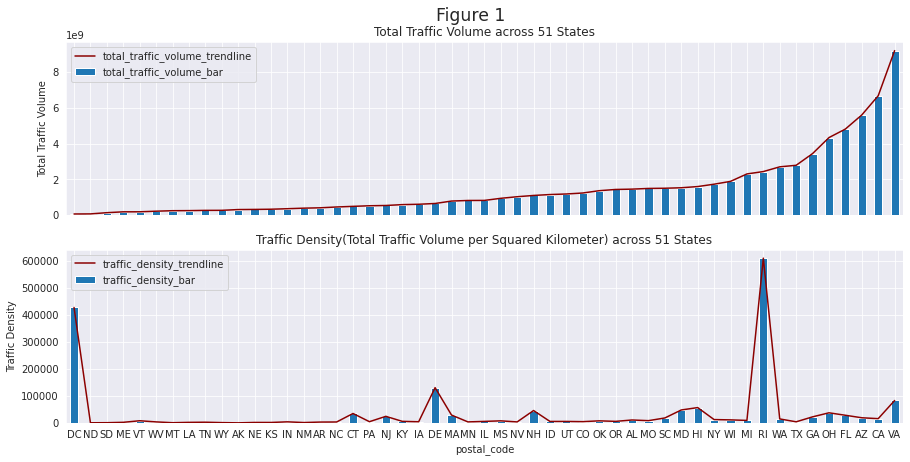

In [17]:
# Plot setting
sns.set_style("darkgrid")
fig, (ax1,ax2)= plt.subplots(2,1,figsize=(30,14),sharex=True,sharey=False)


# Line and bar plot for total traffic volume across 51 states
df_tv_postal.plot(kind='bar',x='postal_code',y='total_traffic_volume',figsize=(15,7),ax=ax1)
df_tv_postal.plot(kind='line',x='postal_code',y='total_traffic_volume',color='darkred',figsize=(15,7),ax=ax1)
ax1.legend(['total_traffic_volume_trendline','total_traffic_volume_bar'])
ax1.set_ylabel('Total Traffic Volume')
ax1.set_title('Total Traffic Volume across 51 States')

# Line and bar plot for traffic density across 51 states
df_tv_postal.plot(kind='bar',x='postal_code',y='traffic_volume_per_sq.km',figsize=(15,7),ax=ax2)
df_tv_postal.plot(kind='line',x='postal_code',y='traffic_volume_per_sq.km',color='darkred',figsize=(15,7),ax=ax2)
ax2.legend(['traffic_density_trendline','traffic_density_bar'])
ax2.set_ylabel('Traffic Density')
ax2.set_title('Traffic Density(Total Traffic Volume per Squared Kilometer) across 51 States')

# Set suptitle of the plot
plt.suptitle('Figure 1',fontsize='xx-large',x=0.5,y=0.95)
plt.show()




**Correlation heatmap for total traffic volume(total_traffic_volume) and traffic density(traffic_volume_per_sq.km)**


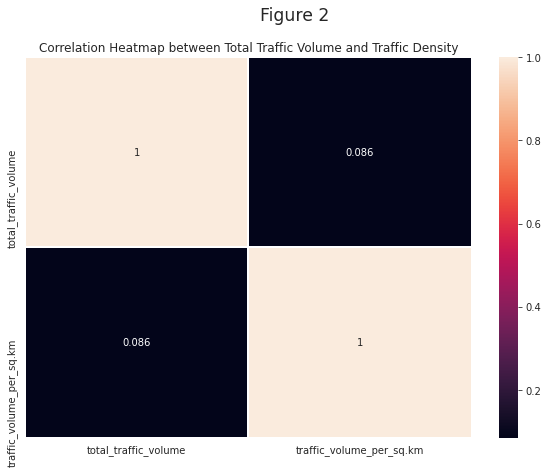

In [18]:
# Plot setting
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")

# Temperary dataframe setup
df_temp = pd.DataFrame(data=df_tv_postal,columns=['total_traffic_volume','traffic_volume_per_sq.km'])

# Heatmap Plot
sns.heatmap(df_temp.corr(),annot=True,linewidths=1)

# Set title and suptitle of the plot
plt.title('Correlation Heatmap between Total Traffic Volume and Traffic Density')
plt.suptitle('Figure 2',fontsize='xx-large')
plt.show()

**Linear regression line plot total traffic volume(total_traffic_volume) and traffic density(traffic_volume_per_sq.km)**


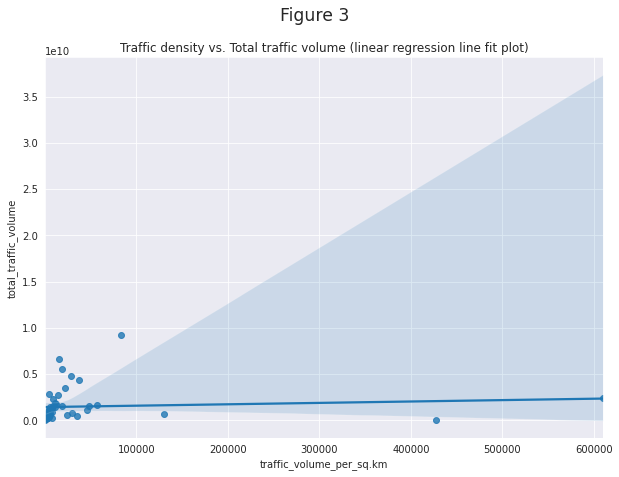

In [19]:
# Plot setting
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")

# Linear regression plot between total traffic volume and traffic density
sns.regplot(x=df_tv_postal['traffic_volume_per_sq.km'],y=df_tv_postal['total_traffic_volume'])

# Set title and suptitle of the plot
plt.title('Traffic density vs. Total traffic volume (linear regression line fit plot)')
plt.suptitle('Figure 3',fontsize='xx-large')
plt.show()



### **Conclusion**

**Conclusion for First Analysis**
************************************************************************************************
From the 1<sup>st</sup> subplot of the **Figure 1** above, we can conclude that Virginia(VA), California(CA), and Arizona(AZ) are the top 3 states with highest total traffic volume in 2015, whereas District of Columbia(DC), North Dakota(ND), and South Dakota(SD) are top 3 states with lowest total traffic volume in 2015. 

However, total traffic volume do not tell us how busy are the traffics across 51 states. To calculate the truthful traffic density across 51 states, divide the total traffic volume from each states by their own states area. From 2<sup>nd</sup> subplot of the **Figure 1**, we are able to visualize that Virginia(VA), California(CA), and Arizona(AZ) do not have the top 3 highest traffic density, whereas District of Columbia(DC) has the 2<sup>nd</sup> highest traffic density eventhough DC has the lowest total traffic volume in overall.

From **Figure 2**(heatmap plot) and **Figure 3**(linear regression plot), we conclude that the positive correlation between total traffic volume and traffic density is very weak. Hence, it is not suitable to use traffic density to predict total traffic volume  or vice-versa for each state.

## **Second Analysis (Pattern Analysis)**
### -> Dividing 1 year into 4 quarters and dividing 1 day to 4 quarters, what is the interesting pattern over 4 different quarters for a day and a year across 51 states? Do both of them have any correlation to each other?  


**Traffic volume and normalized traffic volume plots over 4 yearly quarters plot across 51 states**


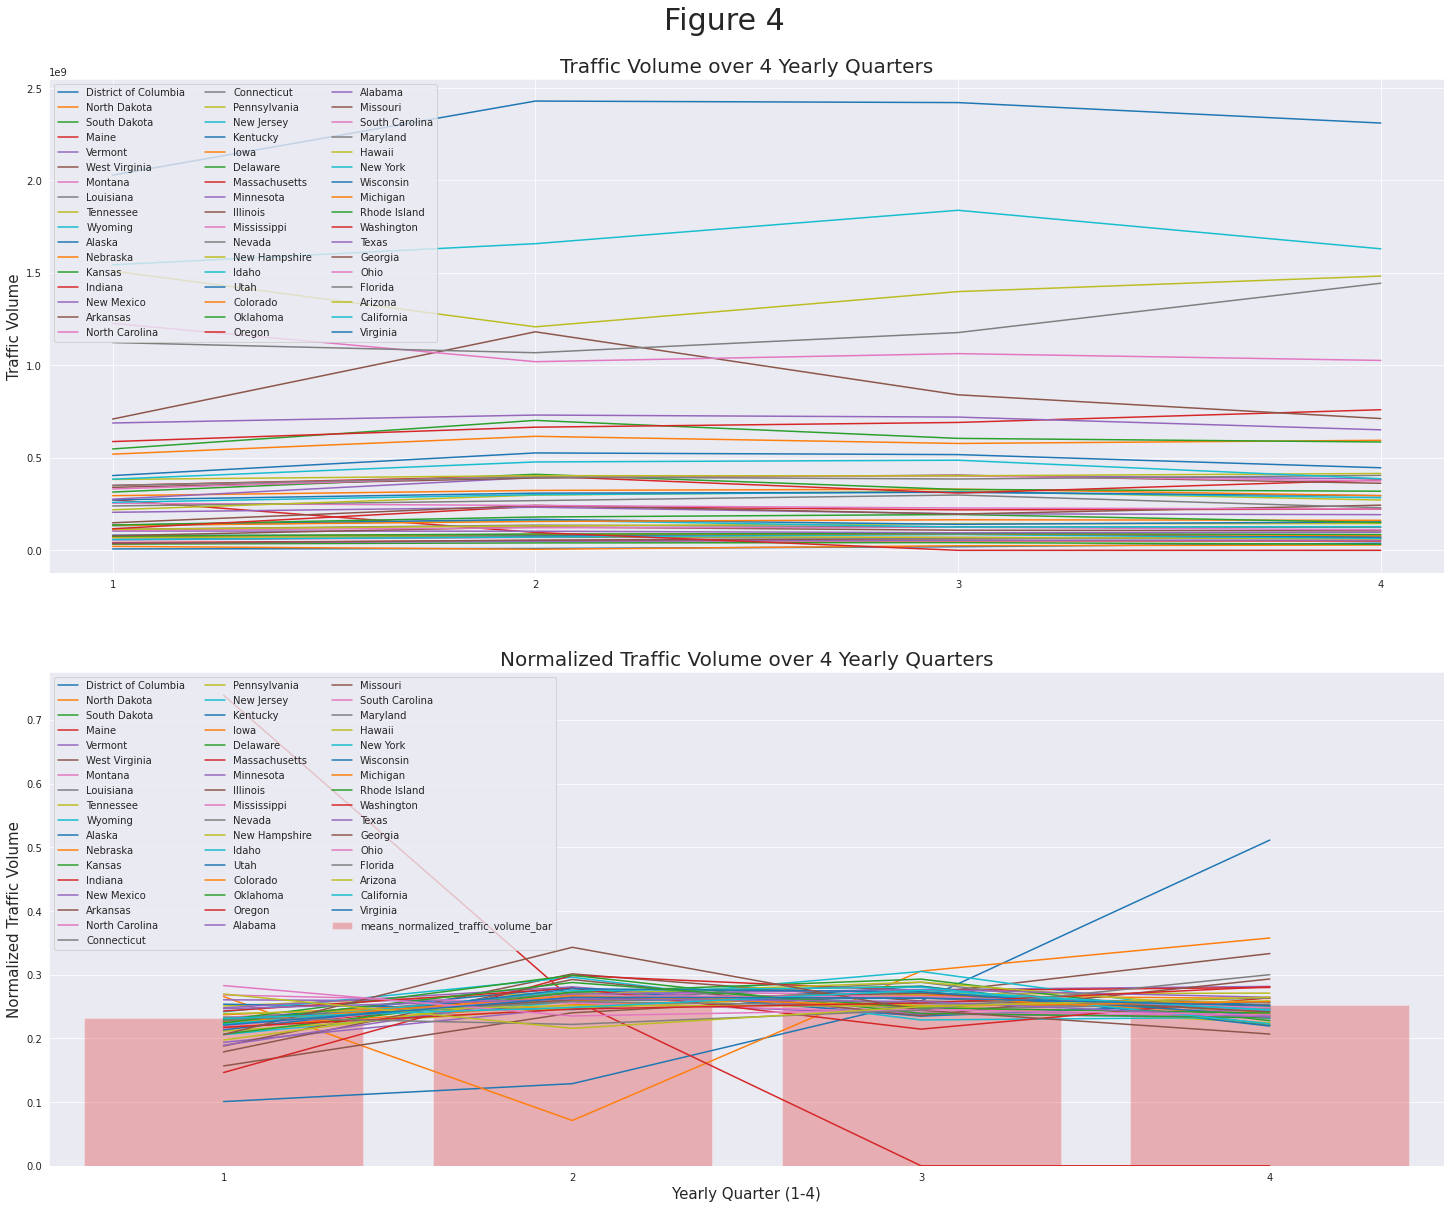

In [20]:
# Plot setting
sns.set_style("darkgrid")
fig, axs= plt.subplots(2,1,figsize=(25,20),sharex=False,sharey=False)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

# Create x axis data [0,1,2,3]
x_range = np.arange(0,4)
# Record normalized data into list for next plotting
normalized_data = [] 

# Line plot for traffic volume and normalized traffic volume over 4 yearly quarter across 51 states
for i in range(51):
    normalized_data.append((df_tv_postal.iloc[i,18:22].values.astype(np.float64)/df_tv_postal.iloc[i,1]).astype(np.float64))

    sns.lineplot(x=np.arange(1,5),y=df_tv_postal.iloc[i,18:22].values.astype(np.float64),alpha=1.0,ax=axs[0],label='{}'.format(df_tv_postal['state'][i]))

    sns.lineplot(x=x_range,y=normalized_data[-1],alpha=1.0,ax=axs[1],label='{}'.format(df_tv_postal['state'][i]))

# Mean bar plot for normalized traffic volume
sns.barplot(x=np.arange(1,5),y=np.array(normalized_data).mean(axis=0),alpha=0.3,ax=axs[1],color='red',label='means_normalized_traffic_volume_bar')


# Set legend, ylabel, xlabel, title and suptitle of the plot
axs[0].legend(ncol=3,loc='upper left',fontsize=10)
axs[1].legend(ncol=3,loc='upper left',fontsize=10)

axs[0].set_ylabel('Traffic Volume',fontsize=15)
axs[1].set_ylabel('Normalized Traffic Volume',fontsize=15)
axs[1].set_xlabel('Yearly Quarter (1-4)',fontsize=15)

axs[0].set_title('Traffic Volume over 4 Yearly Quarters',fontsize=20)
axs[1].set_title('Normalized Traffic Volume over 4 Yearly Quarters',fontsize=20)
plt.suptitle('Figure 4',fontsize=30,x=0.5,y=0.93)
plt.show()


**Traffic volume and normalized traffic volume plots over 4 daily quarters plot across 51 states**


Text(0.5, 0.93, 'Figure 5')

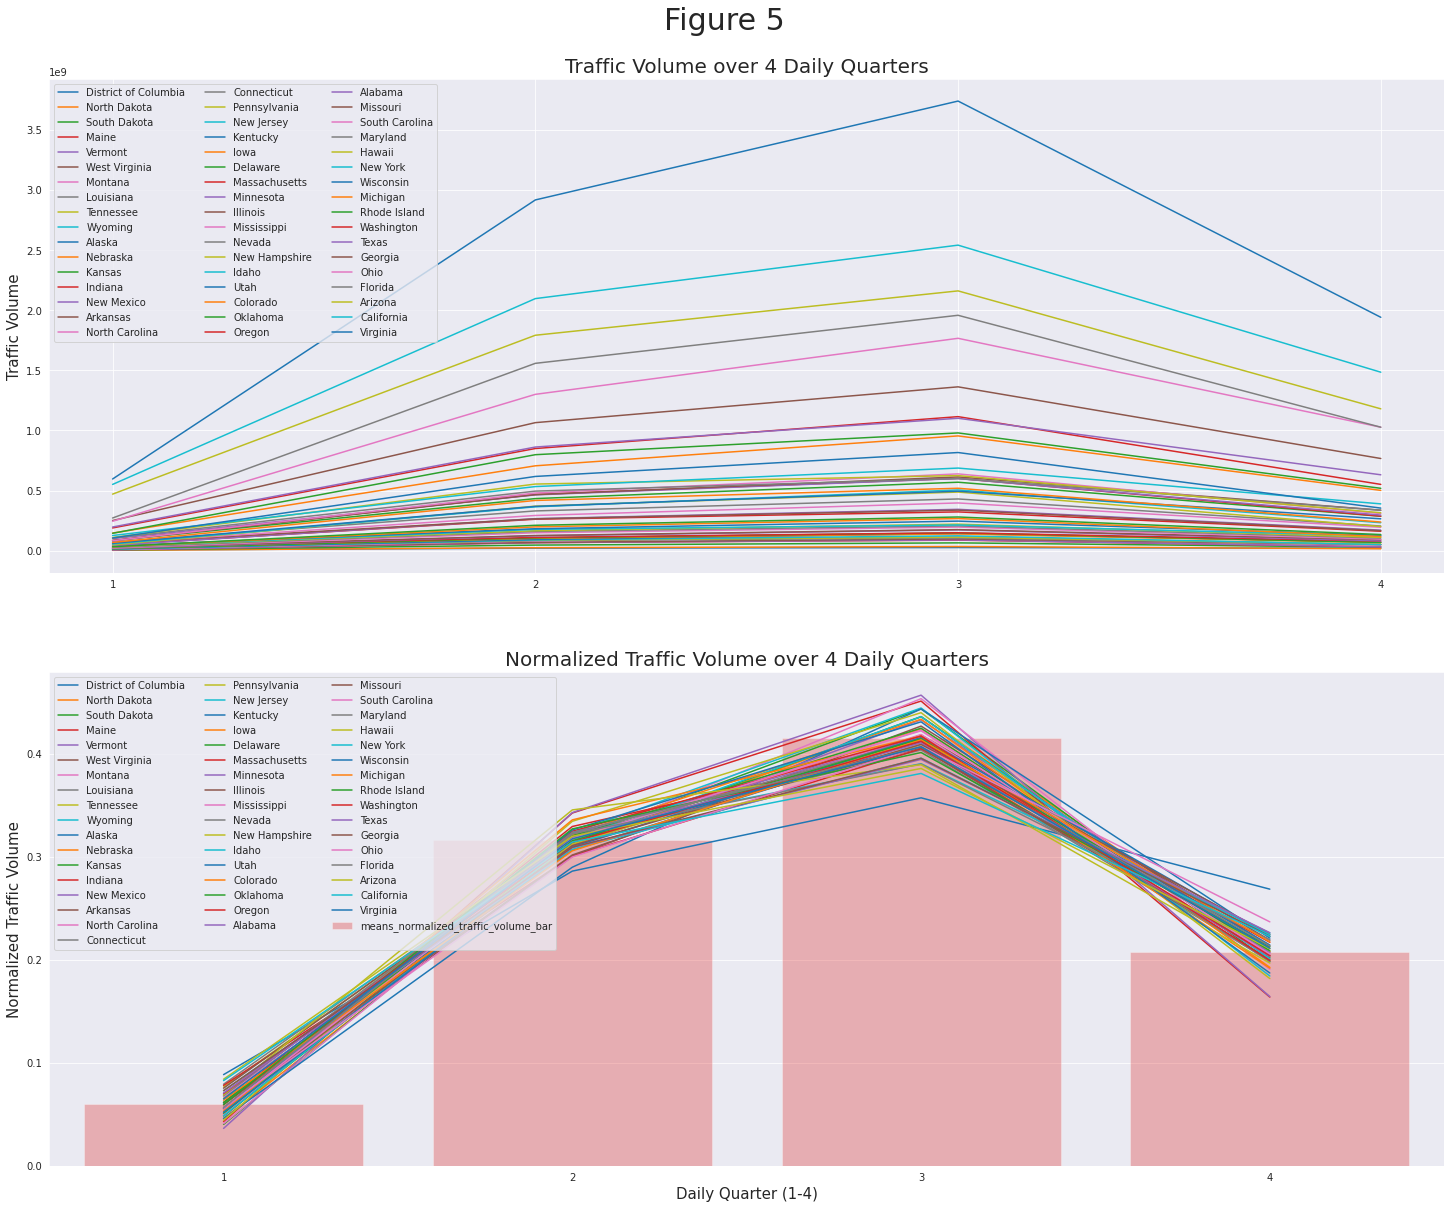

In [21]:
# Plot setting
sns.set_style("darkgrid")
fig, axs= plt.subplots(2,1,figsize=(25,20),sharex=False,sharey=False)
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))

# Create x axis data [0,1,2,3]
x_range = np.arange(0,4)
# Record normalized data into list for next plotting
normalized_data_daily = [] 

# Line plot for traffic volume and normalized traffic volume over 4 daily quarter across 51 states
for i in range(51):
    normalized_data_daily.append((df_tv_postal.iloc[i,22:26].values.astype(np.float64)/df_tv_postal.iloc[i,1].astype(np.float64)))

    sns.lineplot(x=np.arange(1,5),y=df_tv_postal.iloc[i,22:26].values.astype(np.float64),alpha=1.0,ax=axs[0],label='{}'.format(df_tv_postal['state'][i]))

    sns.lineplot(x=x_range,y=normalized_data_daily[-1],alpha=1.0,ax=axs[1],label='{}'.format(df_tv_postal['state'][i]))


# Mean bar plot for normalized traffic volume
sns.barplot(x=np.arange(1,5),y=np.array(normalized_data_daily).mean(axis=0),alpha=0.3,ax=axs[1],color='red',label='means_normalized_traffic_volume_bar')

# Set legend, ylabel, xlabel, title and suptitle of the plot
axs[0].legend(ncol=3,loc='upper left',fontsize=10)
axs[1].legend(ncol=3,loc='upper left',fontsize=10)

axs[0].set_ylabel('Traffic Volume',fontsize=15)
axs[1].set_ylabel('Normalized Traffic Volume',fontsize=15)
axs[1].set_xlabel('Daily Quarter (1-4)',fontsize=15)

axs[0].set_title('Traffic Volume over 4 Daily Quarters',fontsize=20)
axs[1].set_title('Normalized Traffic Volume over 4 Daily Quarters',fontsize=20)
plt.suptitle('Figure 5',fontsize=30,x=0.5,y=0.93)



In [22]:
print('Means Normalized Traffic Volume(Yearly Quarter): {}'.format(np.array(normalized_data).mean(axis=0)))
print('Means Normalized Traffic Volume(Daily Quarter): {}'.format(np.array(normalized_data_daily).mean(axis=0)))

Means Normalized Traffic Volume(Yearly Quarter): [0.23218312 0.25938296 0.256621   0.25181291]
Means Normalized Traffic Volume(Daily Quarter): [0.06033769 0.31656621 0.41561736 0.20747874]


### **Conclusion**

**Conclusion for Second Analysis**
************************************************************************************************
Looking at **Figure 4** above, the 1<sup>st</sup> subplot does not tell us any obvious pattern of traffic volume across 4 yearly quarters in 51 different states as the total traffic volume for each state are enormously different. If we divide the traffic volume of each quarter over the total traffic volume, we can obtain the normalized traffic volume. From the 2<sup>nd</sup> subplot of **Figure 4**, we are able to visualize that the normalized traffic volume has the means value of [0.232183,0.259383,0.256621,0.251813] over 4 yearly quarters in 2015. That means the traffic volume with respect to each state across 4 different quarters across does not fluctuate much.

Similarly, looking at **Figure 5** above, the 1<sup>st</sup> subplot does not tell us any obvious pattern of traffic volume across 4 daily quarters in 51 different states. Hence, we divided the traffic volume of each daily quarter over the total traffic volume to obtain the normalized traffic volume. Looking at the 2<sup>nd</sup> subplot of **Figure 5**, we are able to visualize that 51 states have two common patterns which the normalized traffic volume for 51 states in 1<sup>st</sup> daily quarter is the lowest and the 3<sup>rd</sup> daily quarter is the highest. The normalized traffic volume has the means value of [0.060338,0.316566,0.415617,0.207479] over 4 daily quarters in 2015. It shows the increasing pattern from 1<sup>st</sup> daily quarter to 3<sup>rd</sup> daily quarter and drop in 4<sup>th</sup> daily quarter

In short, there is no correlation between traffic volume in yearly quarter and daily quarter as the former has consistent normalized traffic volume over 4 yearly quarters and the latter has increasing pattern for normalized traffic volume from 1<sup>st</sup> to 3<sup>rd</sup> daily quarters and drop during 4<sup>th</sup> daily quarter.



## **Third Analysis (Model Prediction)**
### -> Create a linear regression model to predict the total traffic volume across 51 states. Choose suitable features from df_tv_postal to predict total traffic volume. How is the performance of the model prediction?


**Choose features from df_tv_postal and create new dataframe(df_model) according selected features**


In [23]:
# 'traffic_volume_month_9','total_stations','total_data','population','area(sq.km)' features are being chosen
col_desired = ['total_traffic_volume','traffic_volume_month_9','total_stations','total_data','population','area(sq.km)']
df_model = pd.DataFrame(data=df_tv_postal,columns=col_desired)


**Correlation heatmap between total traffic volume and 5 other features**


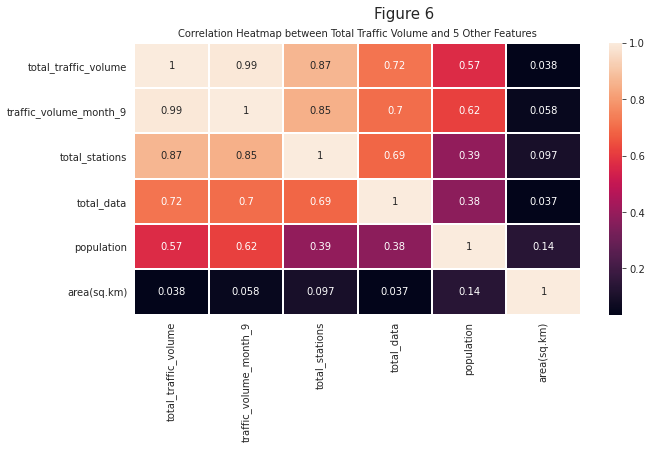

In [24]:
# Figure setting
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")

# Heatmap plot between total traffic volume and 5 other features
sns.heatmap(df_model.corr(),annot=True,linewidths=1)

# Set title and suptitle of the plot
plt.title('Correlation Heatmap between Total Traffic Volume and 5 Other Features',fontsize=10)
plt.suptitle('Figure 6',fontsize=15)
plt.show()

**Regression Pairplot for more insights**


<Figure size 1080x576 with 0 Axes>

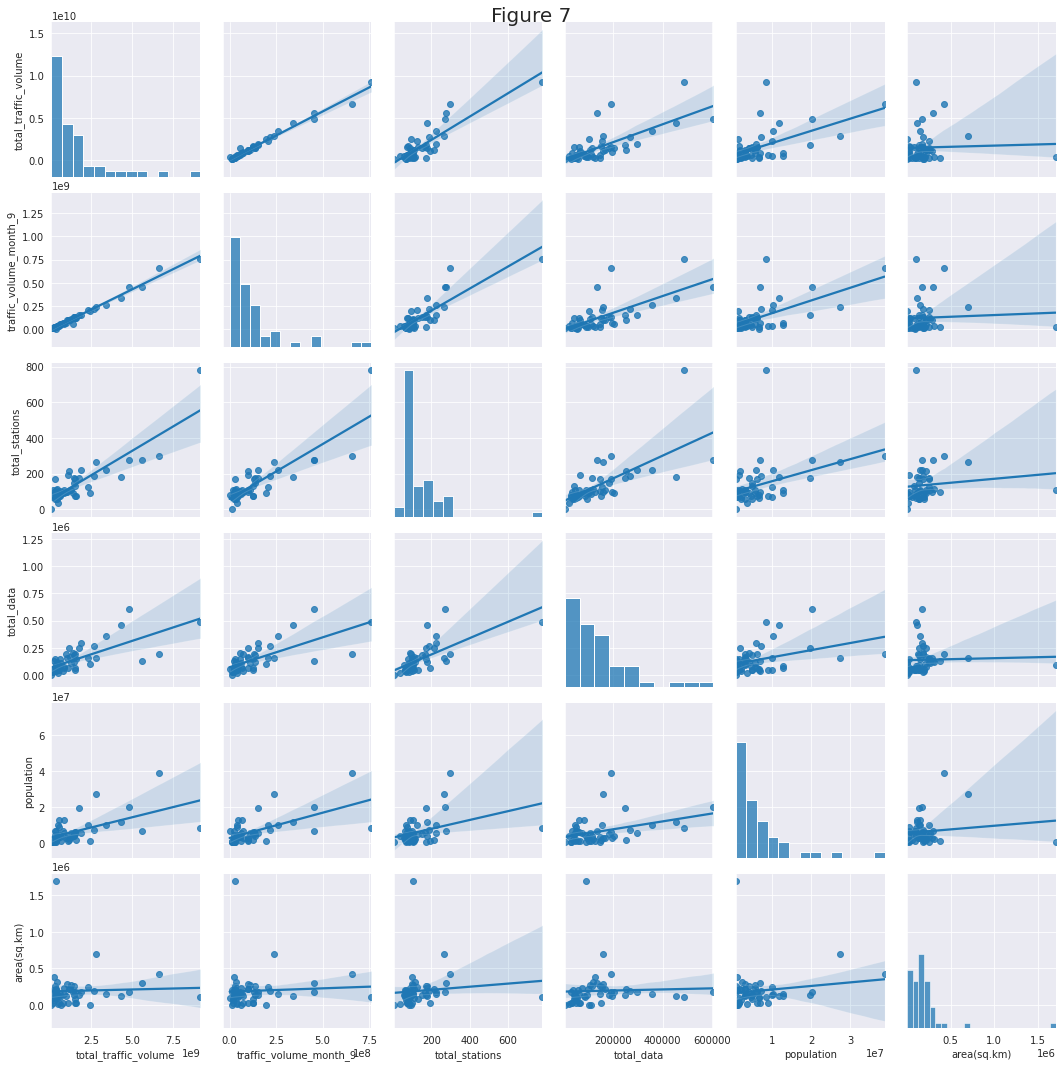

In [25]:
# Figure setting
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")

# Regression Pairplot
sns.pairplot(df_model,kind='reg')

# Set title and suptitle of the plot
plt.suptitle('Figure 7',fontsize=20,x=0.5,y=0.99)
plt.show()

**Seperate df_model data into X_data (5 features) and y_data (total_traffic_volume)**


In [26]:
X_data = df_model.drop(columns='total_traffic_volume')
y_data = df_model['total_traffic_volume']

**Create X and y train and test splits and check the size and shape of train/test splits**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=67)

print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Training feature set size: (35, 5)
Test feature set size: (16, 5)
Training variable set size: (35,)
Test variable set size: (16,)


### **Model fit and training**

**Import linear regression model and metrics from sklearn** 



In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


**Create a linear regression model and fit the train data into the model**


In [29]:
# Creating a Linear Regression object lm
lm = LinearRegression() 

# Fit the linear model on to the lm
lm.fit(X_train,y_train) 


LinearRegression()

**Check the intercept and coefficients**

In [30]:
print("The intercept term of the linear model:", lm.intercept_)


The intercept term of the linear model: -18080112.175171375


In [31]:
print("The coefficients of the linear model:", lm.coef_)


The coefficients of the linear model: [ 1.05980749e+01  1.04777290e+06  6.58832498e+02 -1.10606206e+01
 -1.02277245e+02]


**Use the trained model to predict for the test case**

In [32]:
predictions = lm.predict(X_test)

**Calculate percentage error for each true and predicted total traffic volume**

In [33]:
df_error = pd.DataFrame(data=y_test.values,columns=['true_total_traffic_volume'])
df_error['predicted_total_traffic_volume'] = predictions
df_error['percentage_error'] = np.round(np.abs(df_error['predicted_total_traffic_volume']-df_error['true_total_traffic_volume'])*100/df_error['true_total_traffic_volume'],3)
print('-------------------------Table 1-------------------------')
df_error

-------------------------Table 1-------------------------


,true_total_traffic_volume,predicted_total_traffic_volume,percentage_error
0,258660369,3.764263e+08,45.529
1,80318777,1.660535e+08,106.743
2,597736449,5.389534e+08,9.834
3,420285174,4.436929e+08,5.569
4,329863440,3.324370e+08,0.780
5,1538145665,1.370741e+09,10.884
6,2309091020,2.294542e+09,0.630
7,1374521621,7.408982e+08,46.098
8,5600393206,5.059278e+09,9.662
9,466053858,3.825831e+08,17.910


**Metrics Performance for test set**

In [34]:
print("Root mean square error (RMSE):", np.round(np.sqrt(metrics.mean_squared_error(y_test,predictions)),3))
print("Mean absolute percentage error (MAPE):", np.round(np.mean(df_error['percentage_error']),3))


Root mean square error (RMSE): 241783638.912
Mean absolute percentage error (MAPE): 28.216


### **Conclusion**

**Conclusion for Third Analysis**
************************************************************************************************
Linear regression model is being used to predict total traffic volume of 51 states. 

5 features("traffic_volume_month_9","total_stations","total_data","population","area(sq.km)") are being chosen to fit the into the linear regression model to predict the total traffic volume of 51 states. Looking at **Figure 6** and **Figure 7**, the correlation heatmap and pairplots gave us some insights about the positive correlation between 5 features and total traffic volume. "traffic_volume_month_9" feature has the strongest correlation with total traffic volume whereas the "area(sq.km)" has the weakest.

The dataset are being splitted in the ratio of 7:3 (70% for train, 30% for test). Percentage error between true total traffic volume and predicted traffic volume has been shown in Table 1. The lowest percentage error is 0.630% and the highest percentage error is 106.743%. The mean abosulute percentage error (MAPE) is 28.216% and the root mean square error (RMSE) which also known as standard deviation of the residuals (prediction errors) is 241783638.912.



## **Forth Analysis (Model In-Depth Analysis)**
### -> What is the importance ranking (obtained from t-values) for features to predict total traffic volume? Assuming the threshold p-value=0.05, which feature fails to reject the null hypothesis? What is the R-squared value of the model?


**Calculate standard error, t-value (determine the importance of features), and p-value (to study relationship between total traffic volume and other features)**

In [35]:
from scipy import stats

cdf = pd.DataFrame(data=np.round(lm.coef_,3), index=X_train.columns, columns=["Coefficients"])
newX = np.array(X_train)

n=newX.shape[0]
k=newX.shape[1]
N = n-k

# Predictions for training data
train_pred=lm.predict(X_train)

# Calculsate MSE
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
MSE = sum_error/N

# Calculate standard errror, t_values and p_values
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
cdf['Standard Error'] = np.round(sd_b,3)
cdf['t_values'] = np.round(cdf['Coefficients']/cdf['Standard Error'],3)
cdf['p_values(P>|t|)'] = np.round(2 * (1 - stats.t.cdf(np.abs(cdf['t_values'].values), y_train.shape[0] - X_train.shape[1])),3)
print('-------------------------Table 2-------------------------')
cdf


-------------------------Table 2-------------------------


,Coefficients,Standard Error,t_values,p_values(P>|t|)
traffic_volume_month_9,10.598,0.457,23.190,0.000
total_stations,1047772.904,453079.924,2.313,0.028
total_data,658.832,312.322,2.109,0.043
population,-11.061,5.275,-2.097,0.045
area(sq.km),-102.277,106.996,-0.956,0.347


In [36]:
print("Features arranged in the order of importance for predicting the total traffic volume\n",'-'*90,sep='')
l=list(cdf.sort_values('t_values',ascending=False).index)
print(' > '.join(l))

Features arranged in the order of importance for predicting the total traffic volume
------------------------------------------------------------------------------------------
traffic_volume_month_9 > total_stations > total_data > area(sq.km) > population


**Actual vs. Predicted Total Traffic Volume Regression Plot**

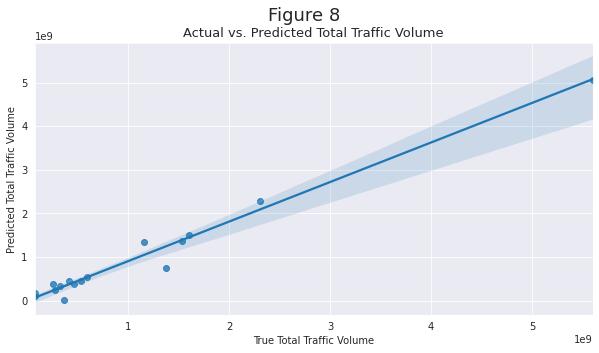

In [37]:
# Plot setting
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))

# Regression plot between true and predicted total traffic volume
sns.regplot(x=y_test,y=predictions)

# Set title, suptitle, xlabel and ylabel of the plot
plt.suptitle('Figure 8',fontsize=18)
plt.title("Actual vs. Predicted Total Traffic Volume",fontsize=13)
plt.xlabel("True Total Traffic Volume",fontsize=10)
plt.ylabel("Predicted Total Traffic Volume", fontsize=10)
plt.show()

**Calculate R-squared of the model**



In [38]:
print("R-squared value of training dataset fit:",round(metrics.r2_score(y_train,train_pred),3))
print("R-squared value of testing dataset fit:",round(metrics.r2_score(y_test,predictions),3))


R-squared value of training dataset fit: 0.992
R-squared value of testing dataset fit: 0.967


### **Conclusion**

**Conclusion for Forth Analysis**
************************************************************************************************

From Table 2, we conclude that 'traffic_volume_month_9' is the most important feature to predict total traffic volume, whereas 'population' feature is the least important feature.

A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis. A lower p-value is sometimes interpreted as meaning there is a stronger relationship between two variables [[p-value reference]](https://www.simplypsychology.org/p-value.html). From Table 2, we can visualize that 'area(sq.km)' feature has the highest p-values which leads to the failure of rejecting the null hypothesis. Hence, we conclude that 'area(sq.km)' feature has a very weak relationship with total traffic volume, whereas the other 4 features have strong relationship with total traffic volume as their p-values are lesser than 0.05

R-sqaured value give some information about the goodness of fit of a model (0-1) [[R-squared reference]](https://en.wikipedia.org/wiki/Coefficient_of_determination). Looking at **Figure 8** above, we are able to visualize that the line fit between true and predicted total traffic volume have high goodness of line fit and high positive correlation. To verify that, R<sup>2</sup> value for testing dataset fit is calculated and the value is 0.967.

## **Fifth Analysis (Pattern Analysis)**
### -> This is the deeper traffic pattern analysis for California. 5 counties will be chosen with respect to the top 5 most recorded data from raw traffic stations dataset. What is the traffic volume pattern across 24 hours for 5 counties? What is the sum of the traffic volume percentage do the 5 counties account for? Is there any interesting traffic volume flow direction across 24 hours for 5 counties?

### **More Feature Engineering for Califronia traffic analysis**

**Obtain California traffic and traffic stations data from raw traffic and traffic stations datasets**

In [39]:
df_ca_ts = df_ts[df_ts['fips_state_code']==6]
df_ca_traffic = df[df['fips_state_code']==6]


**Take a value count wrt fips county code in California and choose top 5 counties in California having the most recorded data in traffic stations dataset**

In [40]:
total_counties_count = df_ts[df_ts['fips_state_code']==6]['fips_county_code'].value_counts().index.shape[0]
top5_index = df_ts[df_ts['fips_state_code']==6]['fips_county_code'].value_counts()[0:5].index
print('Total Counties in California: {}'.format(total_counties_count))
print('Top 5 Counties Fip code: {}'.format(top5_index))

Total Counties in California: 51
Top 5 Counties Fip code: Int64Index([37, 67, 73, 59, 29], dtype='int64')


**Fips county code to county name**

-> Refrence: [California County](https://en.wikipedia.org/wiki/List_of_counties_in_California)

The top reference helps us to locate the county name for county fips code: 37,67,73,59,29

In [41]:
fips_county_code_to_name = {37:'Los Angeles',67:'San Diego',73:'Sacramento',59:'Orange',29:'Kern'}

**Obtain the unique traffic station id for top 5 counties**

In [42]:
import collections

station_id_dict = collections.defaultdict(list)

for x in top5_index:
    station_id_dict[x].append(df_ca_ts[df_ca_ts['fips_county_code']==x]['station_id'].unique())



**Obtain the traffic volume(0000 to 2400) from traffic raw dataset wrt each station id in each counties from raw traffic dataset**

In [43]:
ca_top5_county_tv = []

for x in top5_index:
    ca_top5_county_tv.append([])
    for y in station_id_dict[x][0]:
        ca_top5_county_tv[-1].append(df[df['station_id'] == y].iloc[:,13:37].sum(axis=0).values)
        



**Calculate the sum percentage of traffic volume from top 5 counties over the total traffic volume in California**

In [44]:
remaining = 100 
sns.set_style('darkgrid')
top5_county_tv_percentage = []
ca_total_tv = df_tv_postal[df_tv_postal['postal_code']=='CA']['total_traffic_volume'].values[0]
for i,a in enumerate(top5_index):
    temp = sum(sum(ca_top5_county_tv[i]))*100/ca_total_tv
    remaining -= temp
    top5_county_tv_percentage.append(temp)

**Find out the traffic flow direction in California**

In [45]:
directions_num = df[df['fips_state_code']==6]['direction_of_travel'].unique()
directions_num

array([3, 1, 5, 7])

**Convert traffic flow direction number to name**

In [46]:
directions_num_to_name = {1:'North',3:'East',5:'South',7:'West'}

**Create a 5x4x24 ca_tv_directions array as we have top 5 counties, 4 directions, 24 hours bin. Obtain the traffic volume wrt 5 counties in 4 directions across 24 hours**

In [47]:
ca_tv_directions = np.zeros((5,4,24)) # Top 5 index, 4 Directions, 24 hours bin


for i,x in enumerate(top5_index):
    for y in station_id_dict[x][0]:
        temp = df_ca_traffic[df_ca_traffic['station_id']==y]
        for j,z in enumerate(directions_num):
            ca_tv_directions[i,j,:] += temp[temp['direction_of_travel']==z].iloc[:,13:37].sum(axis=0).values


**Reshape the ca_tv_directions shape to 5x96**

In [48]:
ca_tv_directions = ca_tv_directions.reshape(5,-1)

**Create new dataframe to plot the traffic volume flow direction across 24 hours**

In [49]:
hour_of_day = np.arange(0,24)
hour_of_day = np.concatenate((hour_of_day,hour_of_day,hour_of_day,hour_of_day))
df_ca_directions = pd.DataFrame(data=hour_of_day,columns=['hour_of_day'])

In [50]:
directions_arr = []
for x in directions_num:
    dir_temp = directions_num_to_name[x]
    for i in range(24):
        directions_arr.append(dir_temp)

directions_arr = np.array(directions_arr)

for i,x in enumerate(top5_index):
    df_ca_directions['{}_traffic_volume'.format(fips_county_code_to_name[x])] = ca_tv_directions[i,:]
    df_ca_directions['{} travel direction'.format(fips_county_code_to_name[x])] = directions_arr



**Visualize top 5 rows of the newly created df_ca_directions dataframe**

In [51]:
df_ca_directions.head()

,hour_of_day,Los Angeles_traffic_volume,Los Angeles travel direction,San Diego_traffic_volume,San Diego travel direction,Sacramento_traffic_volume,Sacramento travel direction,Orange_traffic_volume,Orange travel direction,Kern_traffic_volume,Kern travel direction
0,0,5616042.0,East,2862209.0,East,710295.0,East,1796297.0,East,635244.0,East
1,1,3779095.0,East,1989488.0,East,452080.0,East,1237451.0,East,411689.0,East
2,2,3110540.0,East,1457898.0,East,388208.0,East,1025094.0,East,347408.0,East
3,3,2969444.0,East,1420527.0,East,256627.0,East,1019870.0,East,285457.0,East
4,4,4546358.0,East,2175511.0,East,313483.0,East,1782331.0,East,396106.0,East


### **Plots**

**Normalized traffic volume(0000 to 2400) across traffic stations in top 5 counties**

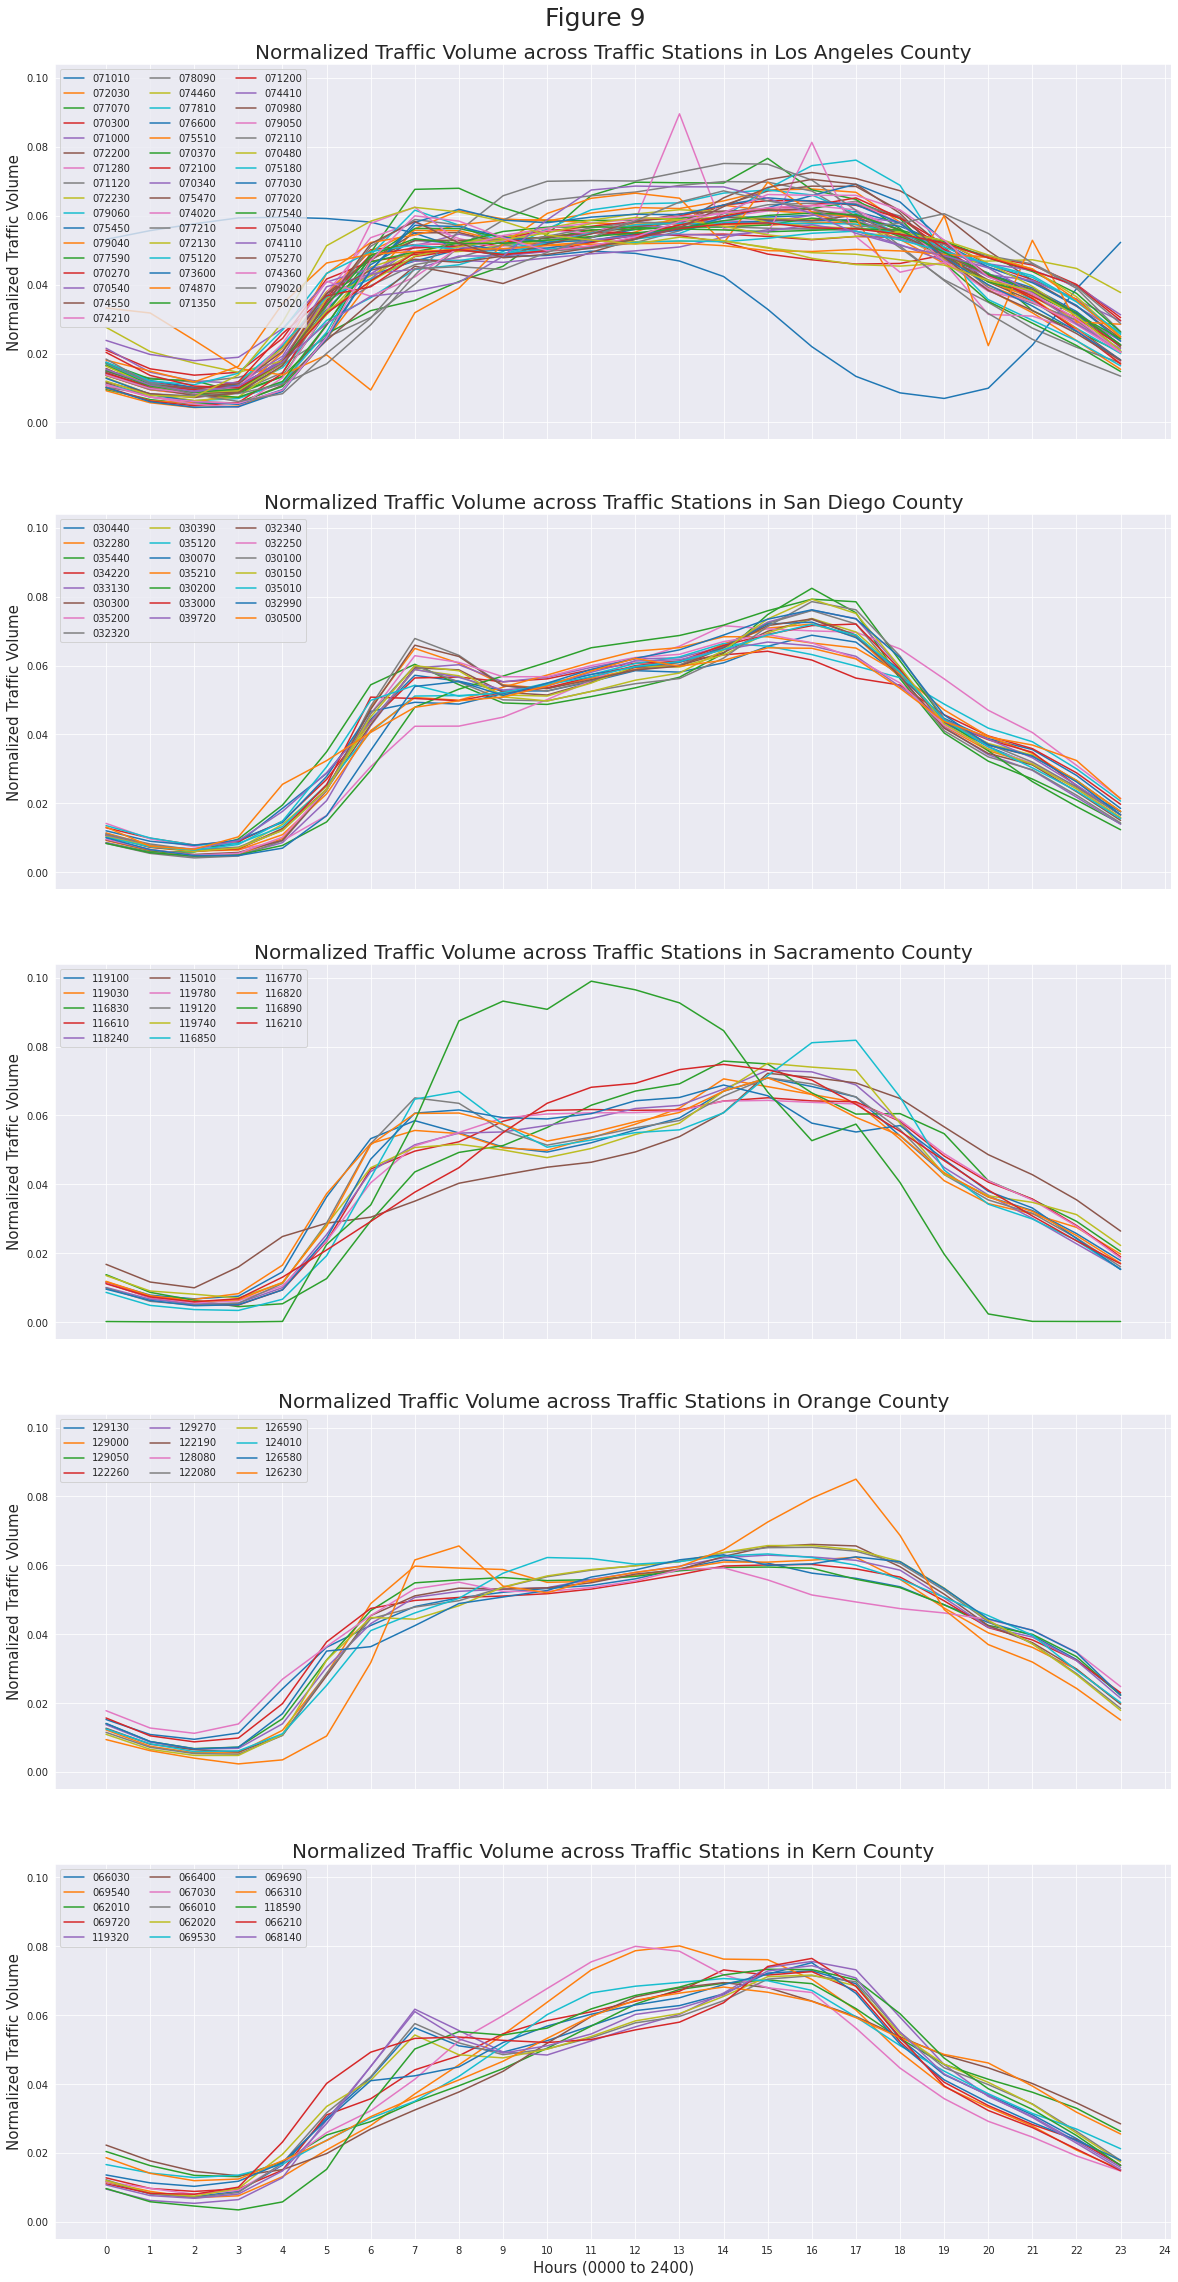

In [52]:
# Plot setting
sns.set_style('darkgrid')
fig, axs = plt.subplots(5,1,figsize=(20,40),sharey=True,sharex=True)

# Line plot
for i,a in enumerate(top5_index):
    axs[i].set_xticks(np.arange(0,25))
    for j,b in enumerate(ca_top5_county_tv[i]):
        if sum(b) != 0:
            sns.lineplot(x=np.arange(0,24),y=b/sum(b),ax=axs[i],label='{}'.format(station_id_dict[a][0][j]))
    # Set legend, title, x_label and y_label for the subplot
    axs[i].legend(ncol=3,loc='upper left',fontsize=10)
    axs[i].set_title('Normalized Traffic Volume across Traffic Stations in {} County'.format(fips_county_code_to_name[a]),fontsize=20)
    axs[i].set_ylabel('Normalized Traffic Volume',fontsize=15)
    axs[i].set_xlabel('Hours (0000 to 2400)',fontsize=15)

fig.suptitle('Figure 9',fontsize=25,x=0.5,y=0.90)    
plt.show()


**Traffic Volume Percentage Barplot**

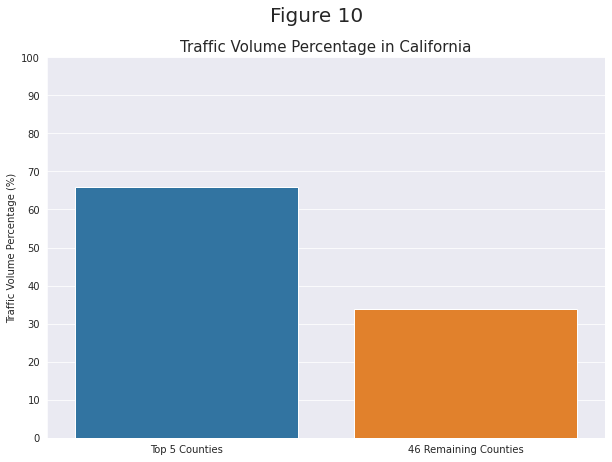

Top 5 counties traffic volume percentage in California: 66.031%
46 remaining counties traffic volume percentage in California: 33.969%


In [53]:
# Plot setting
sns.set_style('darkgrid')
plt.figure(figsize=(10,7))

# Barplot
ax1 = sns.barplot(x = ['Top 5 Counties','46 Remaining Counties'],y = [sum(top5_county_tv_percentage),remaining])

# Set yticks, ylabel, title, and suptitlefor the plot
ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylabel('Traffic Volume Percentage (%)',fontsize=10)
ax1.set_title('Traffic Volume Percentage in California',fontsize=15)
plt.suptitle('Figure 10',fontsize=20)

plt.show()

print('Top 5 counties traffic volume percentage in California: {}%'.format(np.round(sum(top5_county_tv_percentage),3)))
print('46 remaining counties traffic volume percentage in California: {}%'.format(np.round(remaining,3)))


**Traffic volume barplot wrt to travel direction for 5 counties across 24 hours**

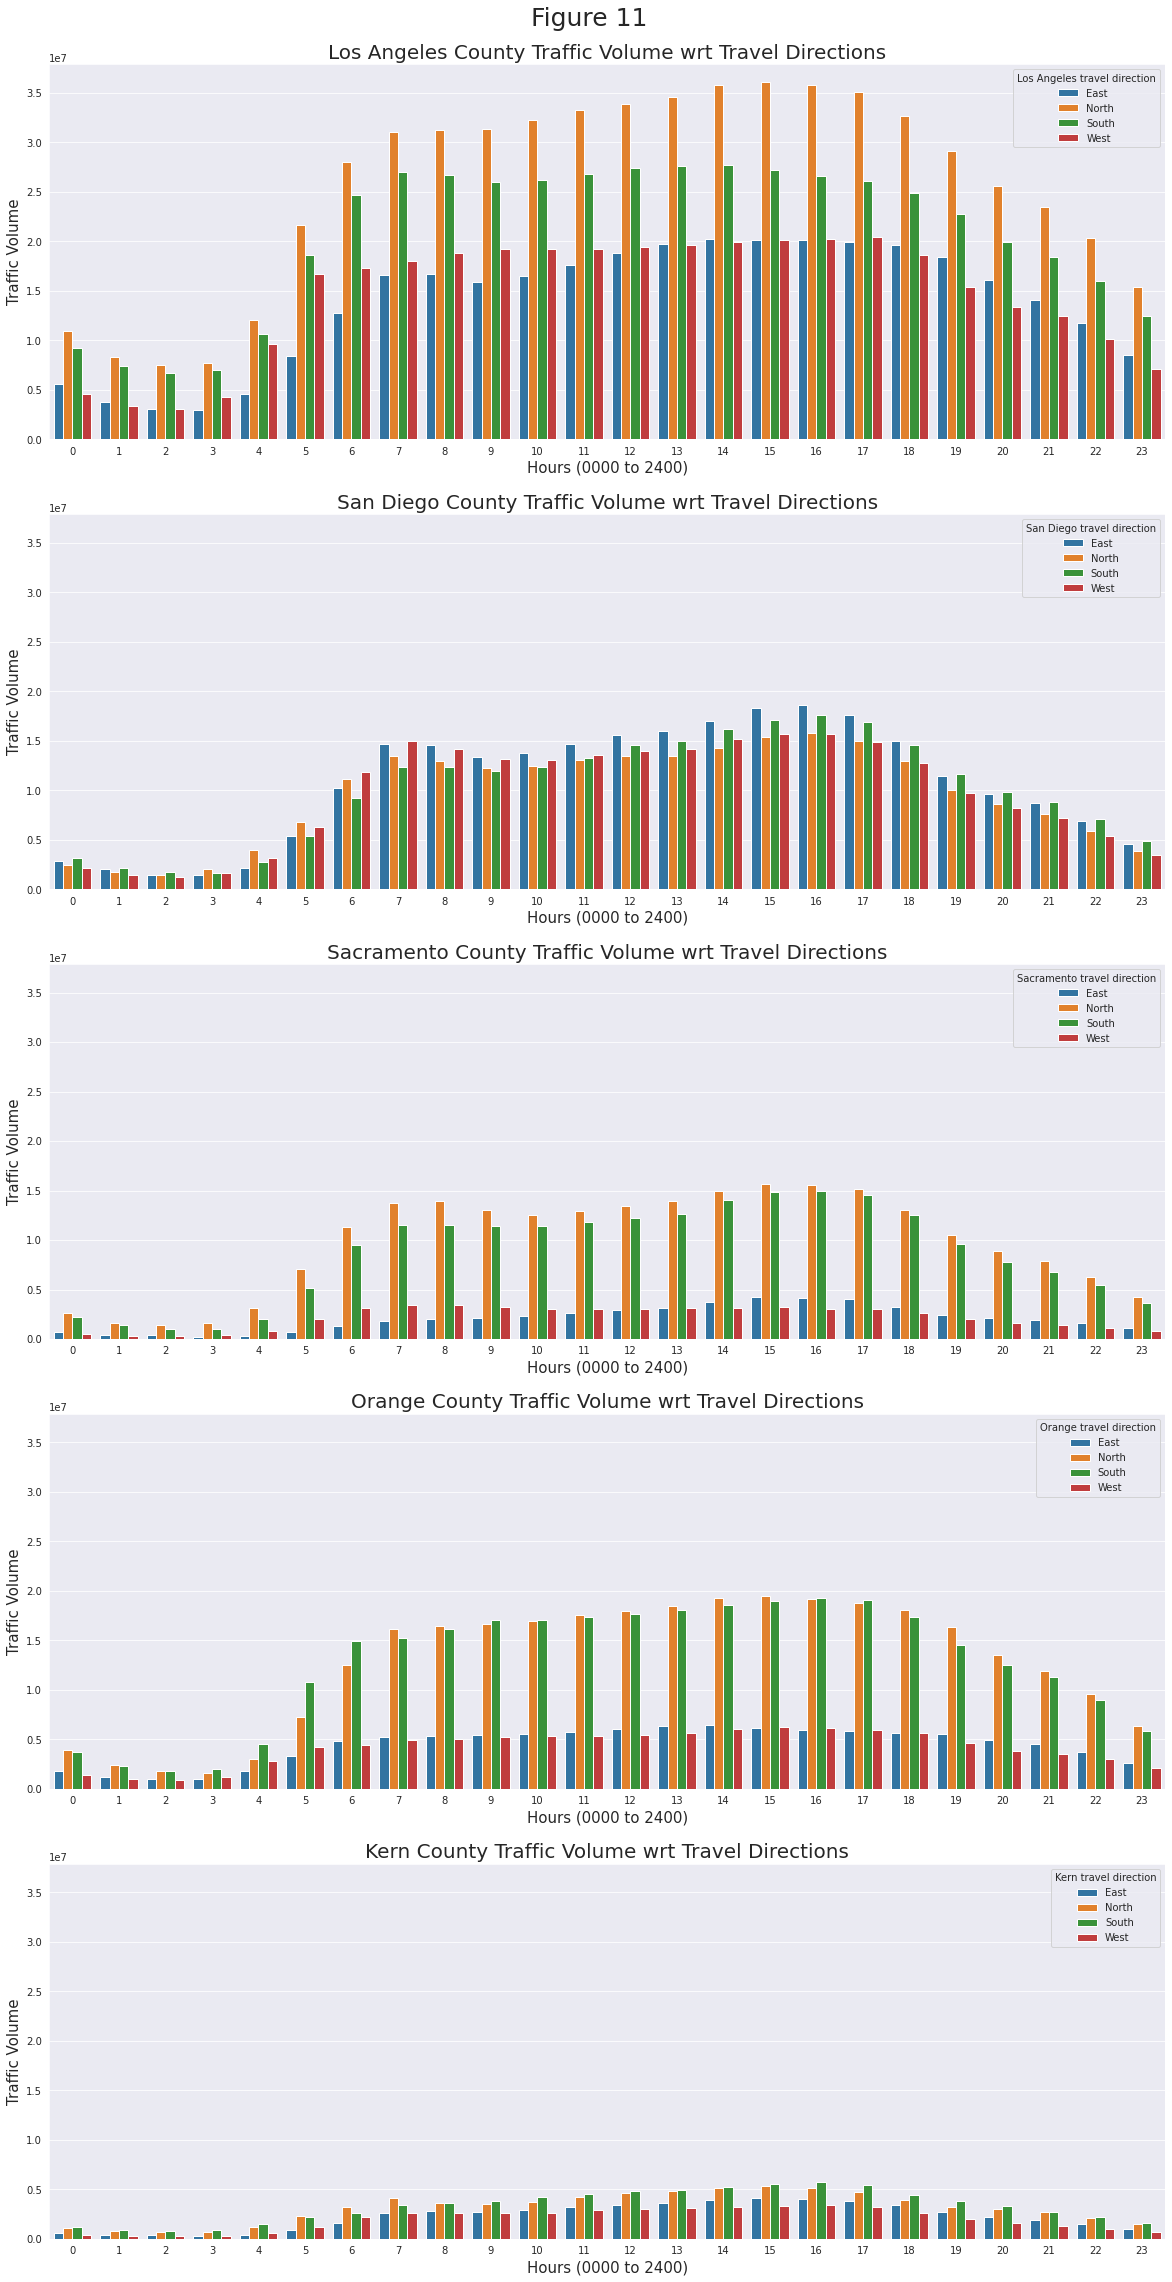

In [54]:
# Plot setting
sns.set_style('darkgrid')
fig,axs = plt.subplots(5,1,figsize=(20,40),sharey=True,sharex=False)

# Barplot
for i,x in enumerate(top5_index):
    sns.barplot(data=df_ca_directions,x='hour_of_day',y='{}_traffic_volume'.format(fips_county_code_to_name[x]),
                hue='{} travel direction'.format(fips_county_code_to_name[x]),ax=axs[i])
    
    # Set xlabel, ylabel and title for the plot
    axs[i].set_ylabel('Traffic Volume',fontsize=15)
    axs[i].set_xlabel('Hours (0000 to 2400)',fontsize=15)
    axs[i].set_title('{} County Traffic Volume wrt Travel Directions'.format(fips_county_code_to_name[x]),fontsize=20)

plt.suptitle('Figure 11',fontsize=25,x=0.5,y=0.9)
plt.show()

### **Conclusion**

**Conclusion for Fifth Analysis**
************************************************************************************************

From **Figure 9**, we can visualize that 5 counties have are having some common traffic patterns. 
- 1st: Most of the traffic stations in 5 counties detect an increasing traffic volume pattern starting at 3am. 
- 2nd: Most of the traffic stations in 5 counties detect their first peak traffic volume at around 7am.
- 3rd: Most of the traffic stations in 5 counties detect their second peak traffic volume at around 4pm.
- 4th: Most of the traffic stations in 5 counties detect a decreasing traffic volume pattern starting at 5pm.

From **Figure 10**, we can visualize that the 5 counties selected account for 66.031% of the total traffic volume in California, whereas the remaining 46 counties only account for 33.969% of the total traffic volume. That means these 5 counties are having high traffic density most of the time compared to other counties.


From **Figure 11**, we can visualize some interesting patterns for the traffic volume flow direction across 5 different counties.
- 1st: Los Angeles county and Sacremento county have a very high traffic flow similarity across 24 hours. The traffic volume to the North are always the higher than the South across 24 hours. From 3am to 12pm, there are more traffic volume to the West compared to the East. Starting from 1pm to 1am, the traffic volume to the East are more than traffic volume to the West.
- 2nd: Every county except San Diego has the highest traffic volume flow in either North or South direction across 24 hours. San Diego has highest traffic volume flow to the East direction at most of hours. 
